# **CVPS20 // Multi-Layer Perceptron Example: Part 2**

*October 22, 2020*

This notebook will continue with an example of using a Multi-Layer Perceptron to classify hand written digits.

---

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import imageio as iio
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# plt.style.use("seaborn-dark")
plt.rcParams["figure.figsize"] = (10, 7)
plt.rcParams["image.interpolation"] = "nearest"
plt.rcParams["image.cmap"] = "gist_gray"

---

### Supervised Learning: Hand-written Digit Recognition with MLPs

Load the hand-written digits data,

In [ ]:
# -- load in the hand-written digits data set
fname = "/content/drive/My Drive/cvps20/data/examples/digits.png"
digits = np.asarray(iio.v2.imread(fname)) / 255.

# -- get a list of individual numbers (note they are 20x20 pixels)
nums = digits.reshape(50, 20, 100, 20).transpose(0, 2, 1, 3).reshape(5000, 20, 20)

# -- create features array [NOTE THE .copy()]
nimg = nums.shape[0]
nrow = nums.shape[1]
ncol = nums.shape[2]
feat = nums.reshape(nimg, nrow * ncol).copy()

# -- set the target
targ = np.concatenate((np.full(500, 0), np.full(500, 1), np.full(500, 2),
                       np.full(500, 3), np.full(500, 4), np.full(500, 5),
                       np.full(500, 6), np.full(500, 7), np.full(500, 8),
                       np.full(500, 9)))

Let's train a **Multi-layer Perceptron classifier**,

In [ ]:
# -- create a training/testing sample
feat_tr, feat_te, targ_tr, targ_te = train_test_split(feat, targ, test_size=0.2, random_state=302)

print("number of training examples : {0}".format(targ_tr.size))
print("number of testing examples  : {0}".format(targ_te.size))

number of training examples : 4000
number of testing examples  : 1000


In [ ]:
# -- instantiate an MLP classifier

mlp = MLPClassifier(hidden_layer_sizes=(10), max_iter=500)
#mlp = MLPClassifier(hidden_layer_sizes=(10))

In [ ]:
# -- train it
mlp.fit(feat_tr, targ_tr)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=10, max_iter=500)

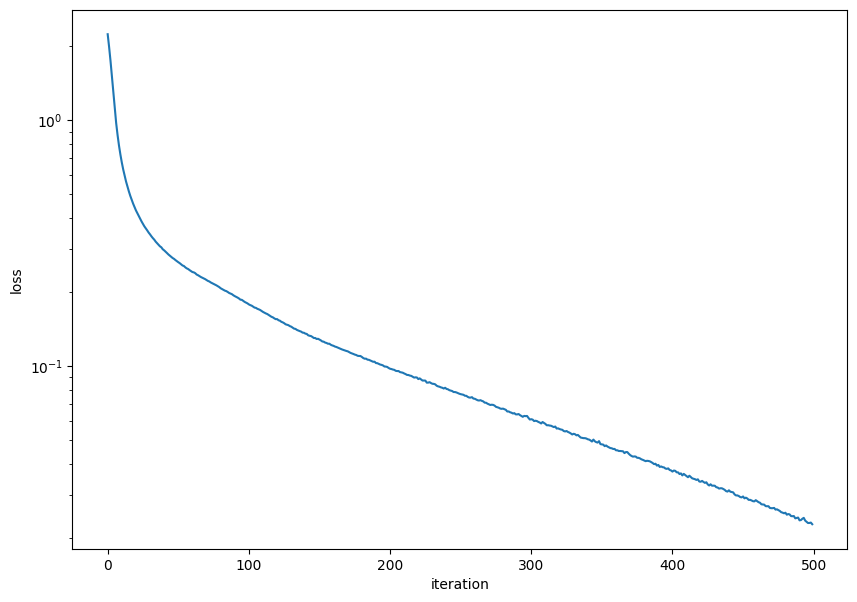

In [ ]:
# -- plot the loss function
fig, ax = plt.subplots()
ax.plot(mlp.loss_curve_)
ax.set_xlabel("iteration")
ax.set_ylabel("loss")
ax.set_yscale("log")
fig.show()

In [ ]:
# -- predict
pred_tr = mlp.predict(feat_tr)
pred_te = mlp.predict(feat_te)

In [ ]:
# -- print accuracy
acc_tr = accuracy_score(targ_tr, pred_tr)
acc_te = accuracy_score(targ_te, pred_te)

print("training accuracy : {0}".format(acc_tr))
print("testing accuracy : {0}".format(acc_te))

training accuracy : 0.99925
testing accuracy : 0.893


              precision    recall  f1-score   support

           0       0.95      0.95      0.95       109
           1       0.98      0.96      0.97        92
           2       0.85      0.86      0.85        98
           3       0.85      0.89      0.87        95
           4       0.92      0.92      0.92       110
           5       0.86      0.83      0.84        93
           6       0.89      0.95      0.92       106
           7       0.92      0.89      0.91        91
           8       0.88      0.80      0.84       102
           9       0.84      0.87      0.85       104

    accuracy                           0.89      1000
   macro avg       0.89      0.89      0.89      1000
weighted avg       0.89      0.89      0.89      1000



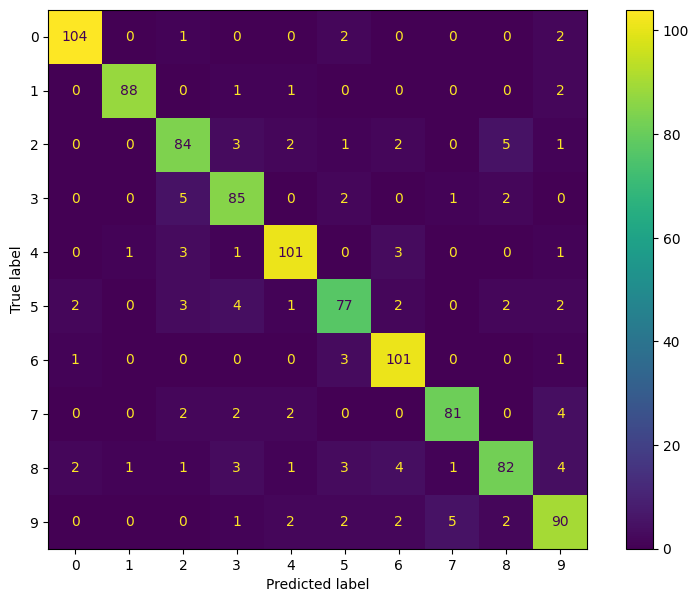

In [ ]:
# -- evaluate performance metrics
ConfusionMatrixDisplay.from_predictions(targ_te, pred_te)
print(classification_report(targ_te, pred_te))

In [ ]:
Coefs = mlp.coefs_
Coefs

[array([[-1.36154854e-223,  7.95869473e-215, -3.93123959e-211, ...,
          1.57169792e-219, -1.08038782e-227, -3.63570693e-221],
        [-1.07726928e-211, -2.95459553e-213,  8.54711961e-225, ...,
          7.67280116e-223,  7.05712668e-225, -5.64962830e-208],
        [-3.30088155e-228, -1.44652023e-218,  4.05257665e-224, ...,
          1.26676178e-212, -4.47076795e-225, -5.14511726e-220],
        ...,
        [-2.32632789e-001,  6.28151349e-008,  1.01747861e-001, ...,
          1.96723910e-001,  8.35194057e-002,  4.07870782e-002],
        [-5.18349115e-213,  1.44167004e-227, -3.36415283e-207, ...,
          4.87123310e-226, -4.26059526e-225, -6.85880722e-227],
        [ 4.09553869e-227,  5.14238346e-220,  1.05295243e-210, ...,
          5.18227684e-219, -4.96073855e-213,  7.10530993e-216]]),
 array([[-8.57047150e-01,  8.90217026e-01,  9.00252898e-01,
         -4.97292871e-01, -9.08920675e-01, -2.04910685e+00,
          7.88241564e-01,  6.02347972e-01, -1.16232685e+00,
          8.2

In [ ]:
len(Coefs)

2

In [ ]:
Coefs[0].shape

(400, 10)

In [ ]:
Coefs[1].shape

(10, 10)

In [ ]:
mlp.intercepts_

[array([ 0.31667873,  0.45717638, -0.17350574,  0.82971856,  0.4652143 ,
         0.23396238,  0.67631743, -0.98507527, -0.13610164,  0.28865105]),
 array([-0.1381254 ,  0.24840753, -0.32444129, -0.04612054,  0.7671912 ,
         1.24008964,  0.32117886,  0.24158941, -1.69017878, -0.9962786 ])]

In [ ]:
mlp.intercepts_[1].shape

(10,)

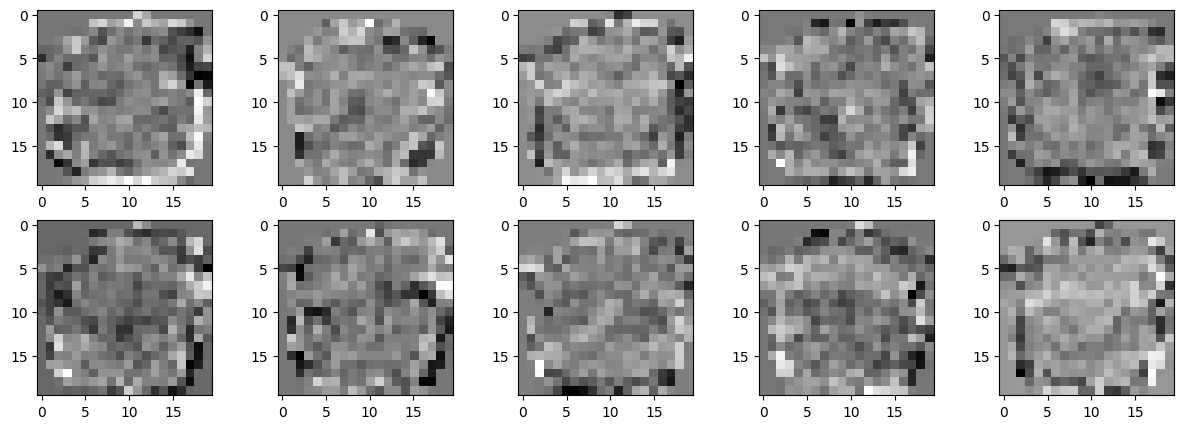

In [ ]:
# -- visualize the weights
ww = mlp.coefs_[0].reshape(20,20,10)

fig, ax = plt.subplots(2, 5, figsize=[15, 5])
for ii in range(10):
  ax[ii // 5, ii % 5].imshow(ww[:, :, ii])